![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Aeolis workshop material Copyright (c) 2017, Bas Hoonhout </div>
<div style="text-align: right"> 2023, Aeolis developer team </div>



# Purpose

This notebook reproduces figure ?? in de Vries et al 2023.

# Run AeoLiS to generate data

- Leave this notebook and switch to your terminal.
- Navigate to the model schematizations.
- Run the following command:

  ``aeolis Run1.txt``


If it is done you can continue reading the model output!

notes during my models setup:
- let's start with a 100m wide beach with a 20m intertidal zone which is consistent with de Vries et. al. 2014.
- let's add an alonshore dimension of 1000m.


In [17]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt


In [52]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:100,0:100]
# save grid to files
np.savetxt('x_grid.txt',x_grid,fmt='%.d')
np.savetxt('y_grid.txt',y_grid,fmt='%.d')
np.savetxt('z_grid.txt',np.ones(np.shape(x_grid)),fmt='%.d')

#generate windfile
angle = 0.
speed = 10.
np.savetxt('wind.txt',[[0, speed, angle],[1, speed, angle]],fmt=('%.d %.d %.d'))






(61, 100, 100)


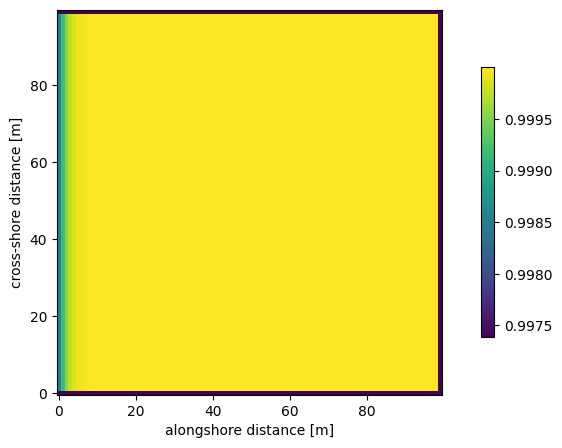

In [54]:
ncfile = 'Run1.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    zb = ds.variables['zb'][...]
    #pickup = ds.variables['pickup_sum'][...]
    print(zb.shape)
    
    # create figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    # plot bed levels and bed level change
    p = ax.pcolormesh(x, y, zb[30,:,:])
    cb = fig.colorbar(p, shrink=.7)
    
    #ax.contour(y, x, zb[0,:,:], [0.], colors=['k'])
        
    ax.set_aspect('equal', adjustable='box')
            
    ax.set_xlabel('alongshore distance [m]')
    ax.set_ylabel('cross-shore distance [m]')




(61, 100, 100)


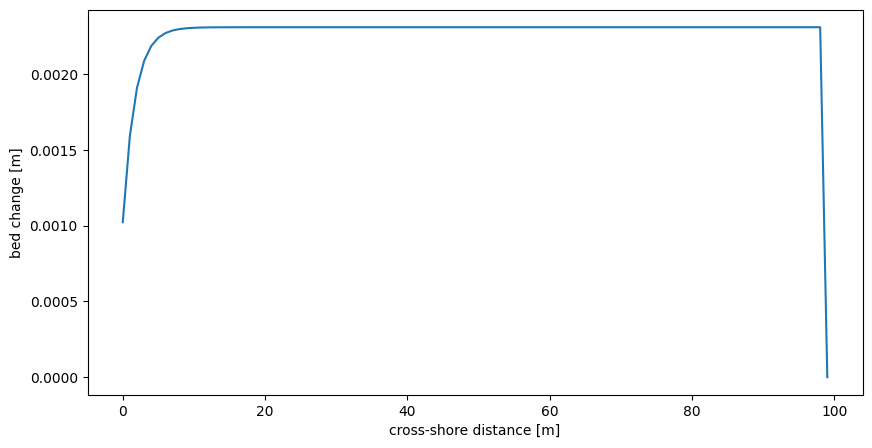

In [57]:
ncfile = 'Run1.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    var = ds.variables['Ct'][...]
    #pickup = ds.variables['pickup_sum'][...]
    print(zb.shape)
    
    # create figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    # plot bed levels and bed level change
    p = ax.plot(var[30,50,:])
    #cb = fig.colorbar(p, shrink=.7)
    
    #ax.contour(y, x, zb[0,:,:], [0.], colors=['k'])
        
    #ax.set_aspect('equal', adjustable='box')
            
    ax.set_ylabel('bed change [m]')
    ax.set_xlabel('cross-shore distance [m]')

# Notes

I am able to run the model with this inputs but only without morphological feedback. If morphological feedback is turned no i get instabilities that seems to be related to dynamic timestepping.

In [ ]:
plot_bathymetry('../models/sandmotor_10year_sorting0_tide0_waves0.nc');
plot_bathymetry('../models/sandmotor_10year_sorting0_tide0_waves0.nc', change=True);

Or we can plot the total erosion volume over time:

In [ ]:
plot_erosion('../models/sandmotor_10year_sorting0_tide0_waves0.nc');

Or create an animation (this takes some time):

In [ ]:
create_animation('../models/sandmotor_10year_sorting0_tide0_waves0.nc');

## 1.3 Run AeoLiS with multiple sediment fractions

Run the model model again, but now with multiple sediment fractions. Use the following command:

``aeolis sandmotor_10year_sorting1_tide0_waves0.txt``

And read the model output.

In [ ]:
plot_bathymetry('../models/sandmotor_10year_sorting1_tide0_waves0.nc');
plot_bathymetry('../models/sandmotor_10year_sorting1_tide0_waves0.nc', change=True);

You can plot the total erosion volume over time from both model runs in a single plot:

In [ ]:
plot_erosion_multi('../models/*_tide0_waves0.nc');

## 1.4 Questions

You just ran and analyzed two AeoLiS models. Please take some time to answer the following questions regarding these runs:

1. What was the simulation time?
- What was the timestep?
- What was the spatial resolution?
- What was the wind speed and direction? Were they constant?
- What were the boundary conditions? Can sediment leave the model domain?
- What model parameters affect the sediment distribution?
- What model parameters affect sediment sorting and beach armoring?
- What was the largest grain size fraction? Is it erodible?
- What differences do you see between both model runs? Can you explain them?